In [23]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics

from IPython.display import display, Markdown


def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true-y_pred)/y_true)) * 100
    
    print(f'Mean Squared Error (MSE) is : {metrics.mean_squared_error(y_true,y_pred)}')

    print(f'Mean Absolute Error (MAE) is : {metrics.mean_absolute_error(y_true,y_pred)}')

    print(f'Root Mean Squared Error (MAE) is : {np.sqrt(metrics.mean_squared_error(y_true,y_pred))}')

    print(f'Coefficient of determination R^2 is : {metrics.r2_score(y_true,y_pred)}', end = '\n\n')

    return

In [26]:
df = pd.read_csv('FB.txt')

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2019-05-17,184.839996,187.580002,184.279999,185.300003,185.300003,10485400
248,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000
249,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
250,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9203300
251,2019-05-23,182.419998,183.899994,179.669998,180.460007,180.460007,10396877


In [5]:
X = df['Close']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [19]:
resu = []
temp_df = pd.DataFrame()
parameters_list = np.arange(0,1.0,0.1)

for i in parameters_list:
    print(f'Fitting for smoothing level = {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v = fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test,fcst_pred_v))
    df3 = {'smoothing parameter': i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)

temp_df.sort_values(by=['RMSE']).head(3)


Fitting for smoothing level = 0.0
Mean Squared Error (MSE) is : 428.9191876208606
Mean Absolute Error (MAE) is : 19.93104062448643
Root Mean Squared Error (MAE) is : 20.71036425611246
Coefficient of determination R^2 is : -12.542190444010913

Fitting for smoothing level = 0.1
Mean Squared Error (MSE) is : 244.72012283908393
Mean Absolute Error (MAE) is : 14.596140434825633
Root Mean Squared Error (MAE) is : 15.643532939815223
Coefficient of determination R^2 is : -6.726505609019388

Fitting for smoothing level = 0.2
Mean Squared Error (MSE) is : 168.59085715845356
Mean Absolute Error (MAE) is : 11.701198652809955
Root Mean Squared Error (MAE) is : 12.984254201087314
Coefficient of determination R^2 is : -4.322889627350818

Fitting for smoothing level = 0.30000000000000004
Mean Squared Error (MSE) is : 135.41668454697373
Mean Absolute Error (MAE) is : 10.185473837826184
Root Mean Squared Error (MAE) is : 11.63686747140199
Coefficient of determination R^2 is : -3.275487281423916

Fitting

C:\Users\damas\AppData\Local\Temp\ipykernel_5648\623605030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
C:\Users\damas\AppData\Local\Temp\ipykernel_5648\623605030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
C:\Users\damas\AppData\Local\Temp\ipykernel_5648\623605030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
C:\Users\damas\AppData\Local\Temp\ipykernel_5648\623605030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)


,smoothing parameter,RMSE
9,0.9,9.922719
8,0.8,10.003854
7,0.7,10.124570


In [20]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=0.9, optimized=False)

fcst_gs_pred = fitSES.forecast(30)

timeseries_evaluation_metrics_func(test, fcst_gs_pred)

Mean Squared Error (MSE) is : 98.46035519022891
Mean Absolute Error (MAE) is : 8.189718673464265
Root Mean Squared Error (MAE) is : 9.922719142968267
Coefficient of determination R^2 is : -2.1086715625080825



In [21]:
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit(optimized=True, use_brute=True)

fcst_auto_pred = fitSES.forecast(30)

timeseries_evaluation_metrics_func(test, fcst_auto_pred)

Mean Squared Error (MSE) is : 98.46035519022891
Mean Absolute Error (MAE) is : 8.189718673464265
Root Mean Squared Error (MAE) is : 9.922719142968267
Coefficient of determination R^2 is : -2.1086715625080825



In [22]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,222
Model:,SimpleExpSmoothing,SSE,3897.009
Optimized:,True,AIC,640.094
Trend:,None,BIC,646.899
Seasonal:,None,AICC,640.278
Seasonal Periods:,None,Date:,"Sun, 18 Sep 2022"
Box-Cox:,False,Time:,19:52:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9858939,alpha,True
initial_level,186.88613,l.0,True


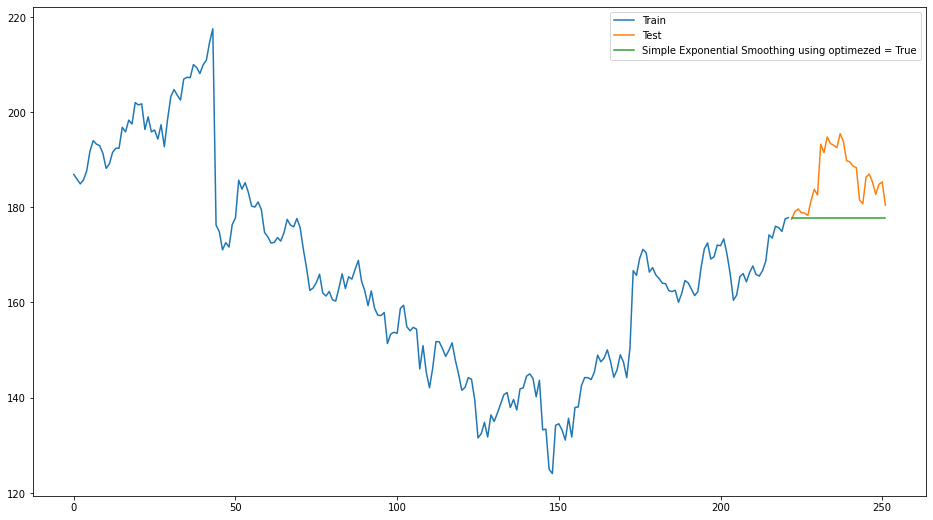

In [27]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred['new_index'] = range(222,252)
df_fcst_auto_pred = df_fcst_auto_pred.set_index('new_index')

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [16,9]
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimezed = True')
plt.legend(loc='best')
plt.show()